# GEOG5990M Final Assignment (Template)

Student ID number:201799133

In [ ]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Pandas packages are used for data analysis, so I can preprocess the data better.

The pltmatplotlib.pyplot package was used to generate graphs such as bar charts for exploring the data.

The seaborn package adds more aesthetics to the matplotlib.pyplot package, making the charts more beautiful and more readable.

### Data Summary

The following three data sources are from data.police.uk<a href="#ref1">[1]</a>

In [ ]:
#Read data
a=pd.read_csv('2021-10-west-yorkshire-street.csv')
b=pd.read_csv('2021-11-west-yorkshire-street.csv')
c=pd.read_csv('2021-12-west-yorkshire-street.csv')

In [ ]:
# Look at the colums in the data
a.columns
b.columns
c.columns

Index(['Crime ID', 'Month', 'Reported by', 'Falls within', 'Longitude',
       'Latitude', 'Location', 'LSOA code', 'LSOA name', 'Crime type',
       'Last outcome category', 'Context'],
      dtype='object')

In [ ]:
#Because the column data for a,b,c is the same, the three data are merged
crime = pd.concat([a,b,c], axis=0)

In [ ]:
# Look at the data types
crime.dtypes
#No obvious errors were found

Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object

After reading some literature <a href="#ref2">[2]</a><a href="#ref3">[3]</a><a href="#ref4">[4]</a>, I wanted to study the crime situation in Leeds city from October to December 2021 and the impact of home invasion crime and house price.So I also downloaded the data of average median house price in 2021 from the Consumer Data Research Center <a href="#ref5">[5]</a> as shown below

In [ ]:
#Read data
price=pd.read_csv('hpssa202103.csv')
price

,lsoacode,hpmd202003,hpmd202103
0,E01011949,95747.0,92692.0
1,E01011950,55862.0,47887.0
2,E01011951,57350.0,49176.0
3,E01011952,88317.0,NaN
4,E01011953,101061.0,137600.0
...,...,...,...
34748,W01001320,154184.0,183575.0
34749,W01001321,110717.0,130441.0
34750,W01001322,108507.0,122119.0
34751,W01001324,147440.0,160467.0


In [ ]:
# Look at the data types
price.dtypes

lsoacode       object
hpmd202003    float64
hpmd202103    float64
dtype: object

In [ ]:
price['hpmd202103'].head(n=50)

0      92692.0
1      47887.0
2      49176.0
3          NaN
4     137600.0
5     121214.0
6      84722.0
7      66292.0
8     321567.0
9     168306.0
10    120917.0
11    161556.0
12    128883.0
13    192838.0
14    250202.0
15    149235.0
16    125840.0
17    137933.0
18    111767.0
19    141906.0
20    168625.0
21     36625.0
22    102652.0
23     45302.0
24     59196.0
25         NaN
26    101857.0
27     87667.0
28     76455.0
29     84200.0
30    335294.0
31    276854.0
32    129906.0
33    128129.0
34    128475.0
35     75510.0
36    120000.0
37     94545.0
38    116760.0
39    136043.0
40    121393.0
41     88863.0
42     64559.0
43    162125.0
44    167720.0
45    165011.0
46    165533.0
47     51150.0
48         NaN
49    108855.0
Name: hpmd202103, dtype: float64

In [ ]:
price['hpmd202103'].tail(n=50)

34703    219333.0
34704    184400.0
34705    301111.0
34706     90000.0
34707    199886.0
34708    265038.0
34709    125076.0
34710    186454.0
34711    194300.0
34712    328541.0
34713    309586.0
34714    307104.0
34715    225764.0
34716    295208.0
34717    122500.0
34718    167125.0
34719    160744.0
34720    135075.0
34721    177809.0
34722    219190.0
34723    105188.0
34724    147402.0
34725    108563.0
34726    100295.0
34727         NaN
34728    206400.0
34729    195917.0
34730    153213.0
34731     84417.0
34732     98233.0
34733    159917.0
34734    126750.0
34735     87286.0
34736     75500.0
34737         NaN
34738    128472.0
34739     91925.0
34740    106167.0
34741     83839.0
34742    105425.0
34743     94414.0
34744    145120.0
34745    145365.0
34746    107222.0
34747    204450.0
34748    183575.0
34749    130441.0
34750    122119.0
34751    160467.0
34752         NaN
Name: hpmd202103, dtype: float64

The table shows that the house prices in 21 years are integers, and this is a floating point number, so let's make it an integer<a href="#ref6">[6]</a>.
But change the type must remove null values, then delete contains NaN values before they are making changes.

In [ ]:
#Delete NaN
price=price.dropna()
#Change the data type
price['hpmd202103'] = price['hpmd202103'].astype(int)
#Check that worked
price['hpmd202103'].dtype

<ipython-input-9-d2f20ba817e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['hpmd202103'] = price['hpmd202103'].astype(int)


dtype('int64')

###Data Cleaning

Only Leeds data was used in this study, but due to the size of the data table it was difficult to filter directly.

I came up with a way of linking the crime and price data by LSOA code, then linking the LSOA code data for Leeds downloaded from the National Statistics <a href="#ref7">[7]</a> and filtering out the data with the name value so that only Leeds data could be found.

In [ ]:
price
#Only 2021 data is needed, delete 20 columns of data
price=price.drop(columns=['hpmd202003'])

In [ ]:
#Link crime and price in the lsoa code column
crime_price=pd.merge(crime,price,left_on='LSOA code',right_on='lsoacode')

In [ ]:
#Link leeds LSOA data
#Read data
LSOA=pd.read_csv('Leeds_LSOA.csv')
LSOA
#Link
Leeds=pd.merge(crime_price,LSOA,left_on='LSOA code',right_on='LSOA21CD')
Leeds

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,lsoacode,hpmd202103,LSOA21CD,LSOA21NM,LSOA21NMW,ObjectId
0,ca71fc5def0be324c8384f831b5f0de101e930983825ea...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.391467,53.941051,On or near Dove Close,E01011698,Leeds 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
1,2f3c1b424eae434228d7dbd65bae33a97e1c1d572604fe...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Other theft,Local resolution,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
2,ff35e73189602c856ae763525db96cb0146d019f0ac6ad...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Public order,Investigation complete; no suspect identified,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
3,c8cdcba8e0fbd50172753fccd12e20bbdab80631136497...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.388135,53.938634,On or near Ainsty Drive,E01011698,Leeds 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
4,8318a224883eb3bdaef2854bbf8ee8a480e256dff2e57c...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.387190,53.938692,On or near Ainsty View,E01011698,Leeds 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24487,35cb2a06787c0d66b5008a2b372cc09fbb2a34f3272e1e...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.523707,53.771317,On or near Montcalm Crescent,E01011470,Leeds 112C,Violence and sexual offences,Investigation complete; no suspect identified,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814
24488,86ef6ac37ada81fb2fccf387beb6ebde473cfebe1f80a0...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Court result unavailable,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814
24489,2e041e1f3e1c18cae6bc7a267bf5ddcc37f26e3c3b28cf...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.510253,53.773609,On or near Lockside Road,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814
24490,64eb5f60865f670fcbbc5f731e711ed4b626ea20629074...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814


In [ ]:
#Select the row that contains the LSOA21CD column data
Leeds_cp=Leeds.dropna(subset=['LSOA21CD'])
#Check data
Leeds_cp

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,lsoacode,hpmd202103,LSOA21CD,LSOA21NM,LSOA21NMW,ObjectId
0,ca71fc5def0be324c8384f831b5f0de101e930983825ea...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.391467,53.941051,On or near Dove Close,E01011698,Leeds 001A,Criminal damage and arson,Investigation complete; no suspect identified,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
1,2f3c1b424eae434228d7dbd65bae33a97e1c1d572604fe...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Other theft,Local resolution,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
2,ff35e73189602c856ae763525db96cb0146d019f0ac6ad...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Public order,Investigation complete; no suspect identified,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
3,c8cdcba8e0fbd50172753fccd12e20bbdab80631136497...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.388135,53.938634,On or near Ainsty Drive,E01011698,Leeds 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
4,8318a224883eb3bdaef2854bbf8ee8a480e256dff2e57c...,2021-10,West Yorkshire Police,West Yorkshire Police,-1.387190,53.938692,On or near Ainsty View,E01011698,Leeds 001A,Violence and sexual offences,Investigation complete; no suspect identified,NaN,E01011698,281089,E01011698,Leeds 001A,NaN,11034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24487,35cb2a06787c0d66b5008a2b372cc09fbb2a34f3272e1e...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.523707,53.771317,On or near Montcalm Crescent,E01011470,Leeds 112C,Violence and sexual offences,Investigation complete; no suspect identified,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814
24488,86ef6ac37ada81fb2fccf387beb6ebde473cfebe1f80a0...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Court result unavailable,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814
24489,2e041e1f3e1c18cae6bc7a267bf5ddcc37f26e3c3b28cf...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.510253,53.773609,On or near Lockside Road,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814
24490,64eb5f60865f670fcbbc5f731e711ed4b626ea20629074...,2021-12,West Yorkshire Police,West Yorkshire Police,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,NaN,E01011470,143666,E01011470,Leeds 112C,NaN,10814


There is a lot of empty data in the table and some duplicate values, for example three columns of LSOA codes are linked and two columns should be removed <a href=‘#ref6’>[6]</a>. Also, the three columns ‘Crime ID’, ‘Reported by’ and ‘Location of crime’ do not help with the relationship between burglary and house prices that I am trying to study, so they also need to be deleted out.

In [ ]:
#Delete useless column
Leeds_cp=Leeds_cp.drop(columns=['Crime ID','Reported by','Falls within','Context','lsoacode','LSOA21CD','LSOA21NM','LSOA21NMW'])
#Check
Leeds_cp

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,hpmd202103,ObjectId
0,2021-10,-1.391467,53.941051,On or near Dove Close,E01011698,Leeds 001A,Criminal damage and arson,Investigation complete; no suspect identified,281089,11034
1,2021-10,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Other theft,Local resolution,281089,11034
2,2021-10,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Public order,Investigation complete; no suspect identified,281089,11034
3,2021-10,-1.388135,53.938634,On or near Ainsty Drive,E01011698,Leeds 001A,Violence and sexual offences,Unable to prosecute suspect,281089,11034
4,2021-10,-1.387190,53.938692,On or near Ainsty View,E01011698,Leeds 001A,Violence and sexual offences,Investigation complete; no suspect identified,281089,11034
...,...,...,...,...,...,...,...,...,...,...
24487,2021-12,-1.523707,53.771317,On or near Montcalm Crescent,E01011470,Leeds 112C,Violence and sexual offences,Investigation complete; no suspect identified,143666,10814
24488,2021-12,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Court result unavailable,143666,10814
24489,2021-12,-1.510253,53.773609,On or near Lockside Road,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,143666,10814
24490,2021-12,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,143666,10814


To facilitate confirmation of a burglary, add a column of judgemental data

In [ ]:
Leeds_cp['result']=Leeds_cp['Crime type'].apply(lambda x:'Yes'if x=='Burglary'else 'No' )
#check
Leeds_cp

,Month,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,hpmd202103,ObjectId,result
0,2021-10-01,-1.391467,53.941051,On or near Dove Close,E01011698,Leeds 001A,Criminal damage and arson,Investigation complete; no suspect identified,281089,11034,No
1,2021-10-01,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Other theft,Local resolution,281089,11034,No
2,2021-10-01,-1.391328,53.938003,On or near Supermarket,E01011698,Leeds 001A,Public order,Investigation complete; no suspect identified,281089,11034,No
3,2021-10-01,-1.388135,53.938634,On or near Ainsty Drive,E01011698,Leeds 001A,Violence and sexual offences,Unable to prosecute suspect,281089,11034,No
4,2021-10-01,-1.387190,53.938692,On or near Ainsty View,E01011698,Leeds 001A,Violence and sexual offences,Investigation complete; no suspect identified,281089,11034,No
...,...,...,...,...,...,...,...,...,...,...,...
24487,2021-12-01,-1.523707,53.771317,On or near Montcalm Crescent,E01011470,Leeds 112C,Violence and sexual offences,Investigation complete; no suspect identified,143666,10814,No
24488,2021-12-01,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Court result unavailable,143666,10814,No
24489,2021-12-01,-1.510253,53.773609,On or near Lockside Road,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,143666,10814,No
24490,2021-12-01,-1.527758,53.772690,On or near Leasowe Avenue,E01011470,Leeds 112C,Violence and sexual offences,Unable to prosecute suspect,143666,10814,No


### Data Exploration


- The main research aspects are as follows
1. How many crimes were committed in October and December of 2021? Which one appears most often? What's the crime rate?
2. Which month had the highest number of Burglary during this period?

In [ ]:
#Count the number of crime types
crime_counts=Leeds_cp['Crime type'].value_counts()

print(crime_counts)

Crime type
Violence and sexual offences    9566
Public order                    2970
Criminal damage and arson       2242
Anti-social behaviour           2196
Other theft                     1653
Burglary                        1388
Shoplifting                     1278
Vehicle crime                   1226
Drugs                            605
Other crime                      468
Robbery                          278
Theft from the person            273
Bicycle theft                    192
Possession of weapons            157
Name: count, dtype: int64


In [ ]:
#Calculate the proportion
crime_percentage=crime_counts/crime_counts.sum() * 100

print(crime_percentage)

Crime type
Violence and sexual offences    39.057651
Public order                    12.126409
Criminal damage and arson        9.154009
Anti-social behaviour            8.966193
Other theft                      6.749143
Burglary                         5.667157
Shoplifting                      5.218030
Vehicle crime                    5.005716
Drugs                            2.470194
Other crime                      1.910828
Robbery                          1.135065
Theft from the person            1.114650
Bicycle theft                    0.783929
Possession of weapons            0.641026
Name: count, dtype: float64


It can be seen that from October to December 2021, the most common type of crime in Leeds was Violence and sexual offences, accounting for about 39.1%. The number of burglaries was 1,433, accounting for 5.4%.

In [ ]:
#Burglary by month
#Convert the date column to datetime type
Leeds_cp['Month']=pd.to_datetime(Leeds_cp['Month'])
#Group according to month and count the occurrence of 'Crime type' column
crime_type_by_month=Leeds_cp.groupby(Leeds_cp['Month'].dt.month)['Crime type'].value_counts()
# Extract the number of Crime type in each month
event_counts=crime_type_by_month.unstack().fillna(0)
print(event_counts)

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Month                                                        
10                            865             45       447   
11                            800             93       491   
12                            531             54       450   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
Month                                                                    
10                                661    193          156          415   
11                                843    215          145          638   
12                                738    197          167          600   

Crime type  Possession of weapons  Public order  Robbery  Shoplifting  \
Month                                                                   
10                             49           917       83          348   
11                             53          1063       92          487   
12                        

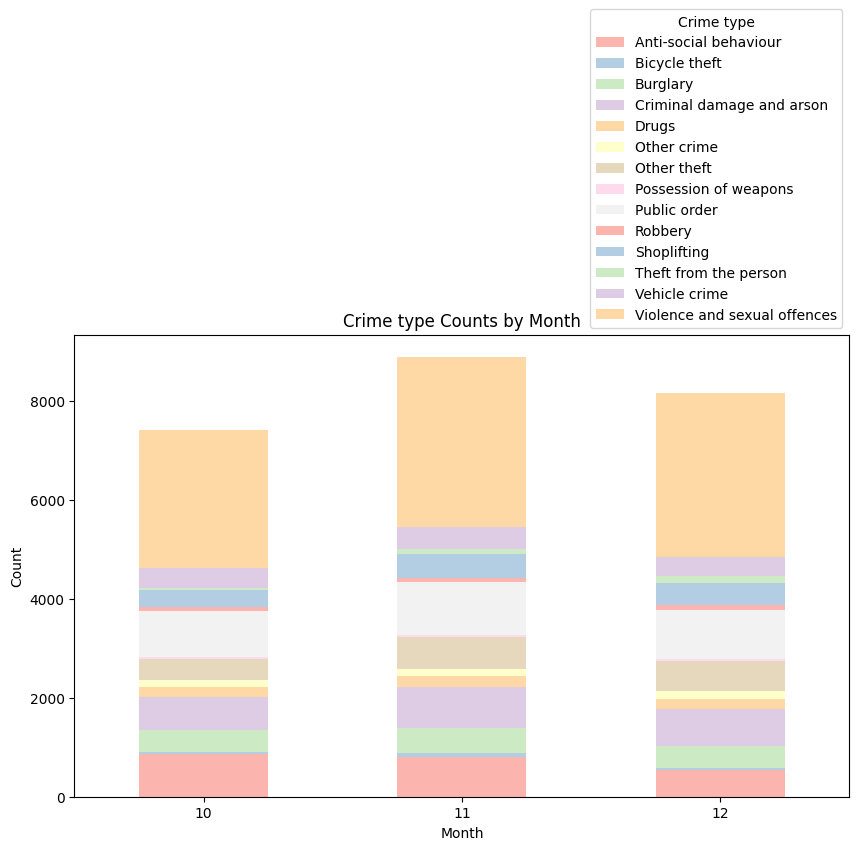

In [ ]:
#Drawing histogram
sns.set_palette('Pastel1')
event_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Crime type Counts by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Crime type',loc='lower right',bbox_to_anchor=(1, 1))
plt.show()

It is clear from the above that the month with the highest incidence of burglary was October, with at least one occurrence in November and October and relatively few in December.

###Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

Data visualization mainly explores the following two aspects:
1. non-spatial visualization

Visualization was used to determine whether there was a relationship between Purpose: If it is really proportional, people living in areas with higher prices are reminded to pay attention to the security of their accommodation and to regularly check for suspicious situations around their accommodation. Security resources can be allocated more easily and more effectively to keep everyone safe.

2. sptial visualization

Clustering of coordinate data using k-means method and determining the central coordinate point of each cluster
Purpose:To process the crime records to get multiple clusters and to get the centre coordinates of the clusters to facilitate the creation of a central police station. This is because the establishment of police stations in the centre of crime hotspots can enhance crime prevention and control.


- non-spatial visualization

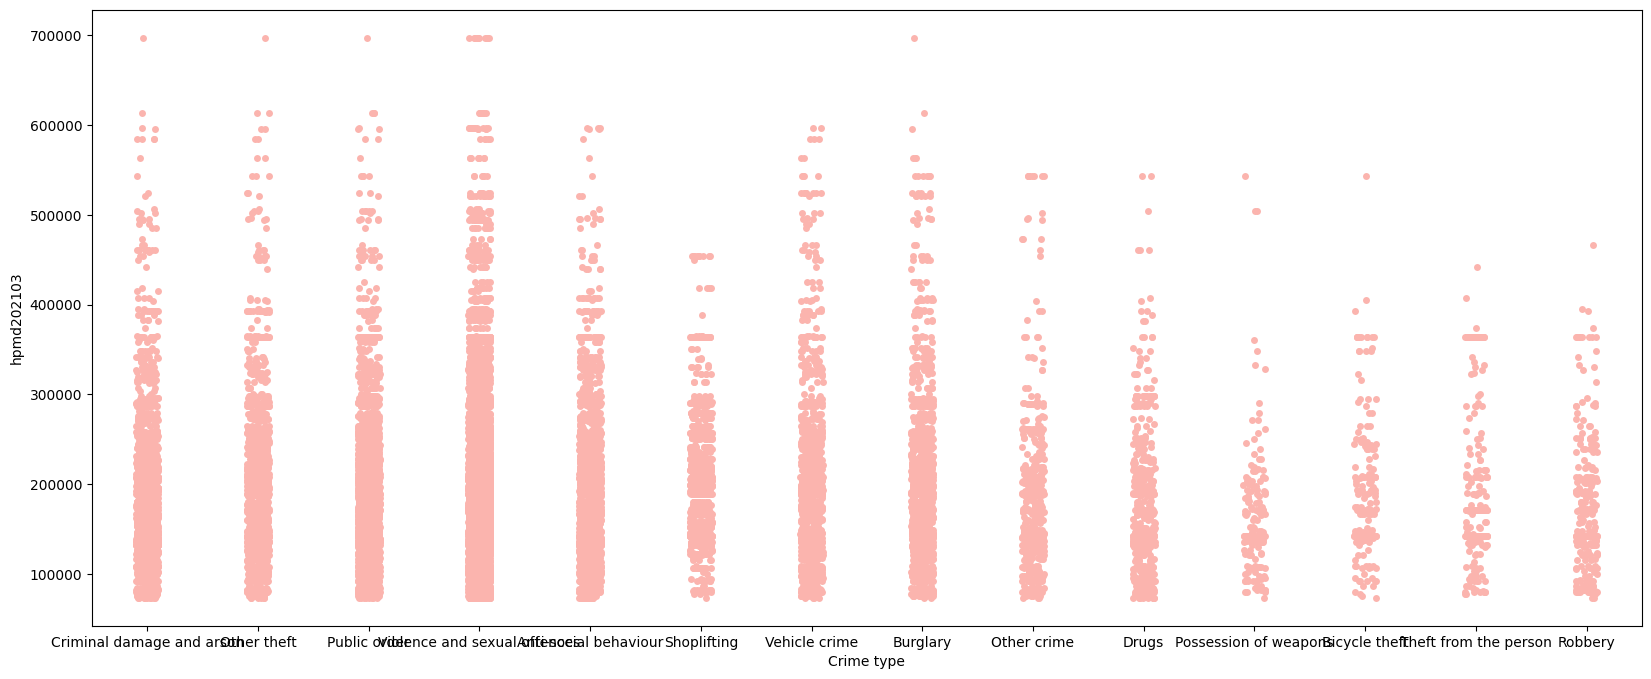

In [ ]:
#Generate scatterplots for burglary and house price data to explore relationships
plt.figure(figsize=(20, 8))
sns.stripplot(x='Crime type',y='hpmd202103',data=Leeds_cp)
plt.show()


Graphics are not very intuitive, need to change some styles

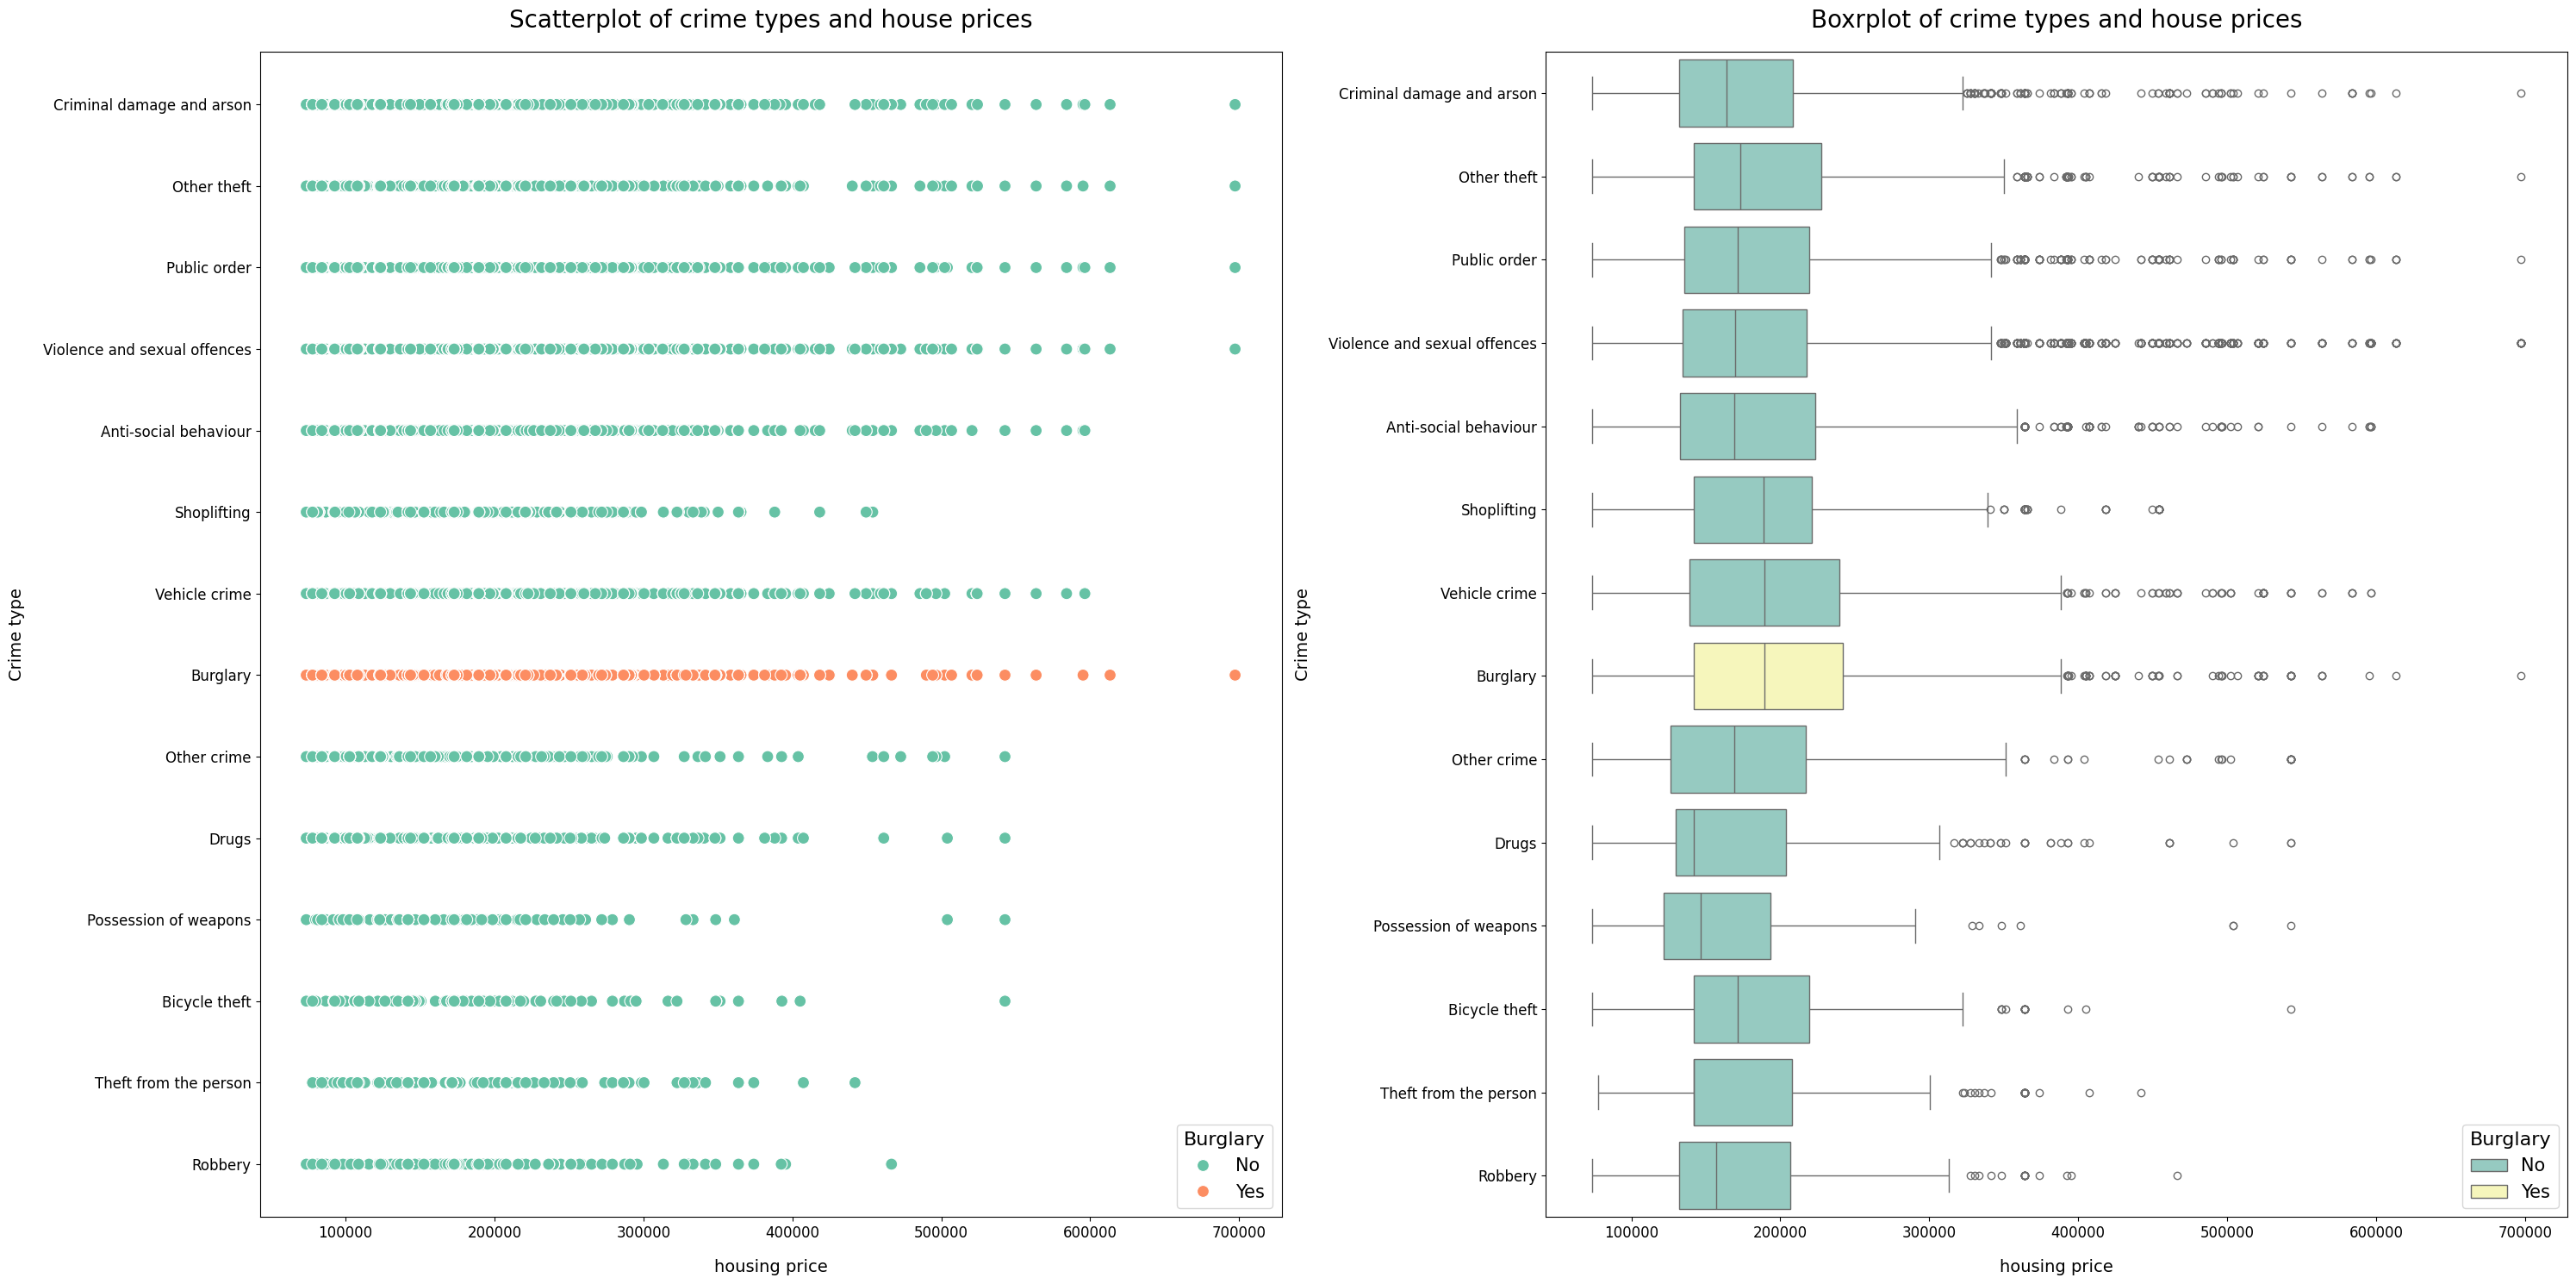

In [ ]:
#Create a graphical object containing two subgraphs
fig, axes = plt.subplots(1, 2, figsize=(30,15))

#Plot a scatterplot of the first data table and add a legend
#Changing colours for clarity
sns.scatterplot(x='hpmd202103',y='Crime type',data=Leeds_cp,hue='result',palette='Set2',ax=axes[0],s=100)
axes[0].set_title('Scatterplot of crime types and house prices', size=20, pad=20)
axes[0].set_xlabel('housing price', size=14, labelpad=15)
axes[0].set_ylabel('Crime type', size=14, labelpad=15)
axes[0].tick_params(axis='both', which='major', labelsize=12)

#Draw the violin for the second data table and add the legend
sns.boxplot(x='hpmd202103',y='Crime type',data=Leeds_cp,hue='result',palette='Set3',ax=axes[1])
axes[1].set_title('Boxrplot of crime types and house prices', size=20, pad=20)
axes[1].set_xlabel('housing price', size=14, labelpad=15)
axes[1].set_ylabel('Crime type', size=14, labelpad=15)
axes[1].tick_params(axis='both', which='major', labelsize=12)

#Adjustment of legend position and title
axes[0].legend(title='Burglary', loc='lower right', fontsize='15', title_fontsize='16')
axes[1].legend(title='Burglary', loc='lower right', fontsize='15', title_fontsize='16')

#Adjustment of the layout
plt.tight_layout()
plt.show()

From the scatterplot, it can be concluded that there is no obvious positive relationship between burglary and house price, house price in the range of 100,000-300,000 has more cases of burglary, but house price in the range of 400,000 and above has fewer cases of burglary.
The box plot shows that the median house price for burglary is basically in the middle of the range, with a relatively even distribution. However, there are some outliers, meaning that houses above 400,000 do not mean that there are fewer burglaries, and there are occasionally.

- spatial visualization

method:k-means
k-means is an unsupervised classification algorithm that is simple and fast, and allows you to define the centre of clusters and form multiple clusters of data close to the centre. A way to make the data within the clusters similar while the data outside the clusters are more different from each other. The cluster centres obtained using crime data are ideal for establishing new police stations, facilitating crime prevention and improving police management capabilities.<a href="#ref6">[6]</a> <a href="#ref8">[8]</a> <a href="#ref9">[9]</a> <a href="#ref10">[10]</a> <a href="#ref11">[11]</a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Longitude   Latitude  cluster
0      -1.391467  53.941051        4
1      -1.391328  53.938003        4
2      -1.391328  53.938003        4
3      -1.388135  53.938634        4
4      -1.387190  53.938692        4
...          ...        ...      ...
24487  -1.523707  53.771317        2
24488  -1.527758  53.772690        2
24489  -1.510253  53.773609        2
24490  -1.527758  53.772690        2
24491  -1.523707  53.771317        2

[24492 rows x 3 columns]


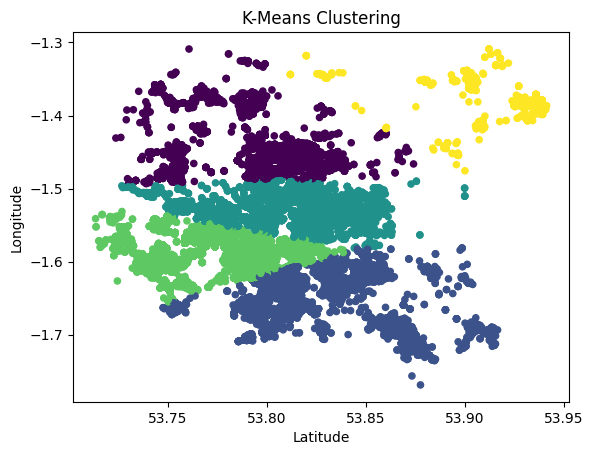

In [ ]:
#Add the required packages
import numpy as np
from sklearn.cluster import KMeans

#Create a DataFrame
loc=Leeds_cp[['Longitude','Latitude']].copy()
loc= pd.DataFrame(loc)

#Define the model
#Set K value
k=5
model=KMeans(n_clusters=k,init="random",max_iter=200, tol=1e-04)
#Training model
model=model.fit(loc)

#Add clustering labels to the DataFrame
loc['cluster']=model.labels_
print(loc)

#draw the clusters
#label and title edit
plt.xlabel('Latitude',fontsize=10)
plt.ylabel('Longitude',fontsize=10)
plt.title('K-Means Clustering')

plt.scatter(loc['Latitude'],loc['Longitude'],c=loc['cluster'],cmap='viridis',s=20)
plt.show()

As shown in the figure, I get a visualisation of the k-means cluster analysis, but it looks a bit strange because there is no base map, so modifications are made to this visualisation to make it more intuitive

In [ ]:
#Add the required packages
!pip install geoplot

In [ ]:
#Add the required packages
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from matplotlib.lines import Line2D

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Longitude   Latitude  cluster
0      -1.391467  53.941051        1
1      -1.391328  53.938003        1
2      -1.391328  53.938003        1
3      -1.388135  53.938634        1
4      -1.387190  53.938692        1
...          ...        ...      ...
24487  -1.523707  53.771317        4
24488  -1.527758  53.772690        4
24489  -1.510253  53.773609        4
24490  -1.527758  53.772690        4
24491  -1.523707  53.771317        4

[24492 rows x 3 columns]


<ipython-input-96-e13020331499>:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  Leeds_map=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


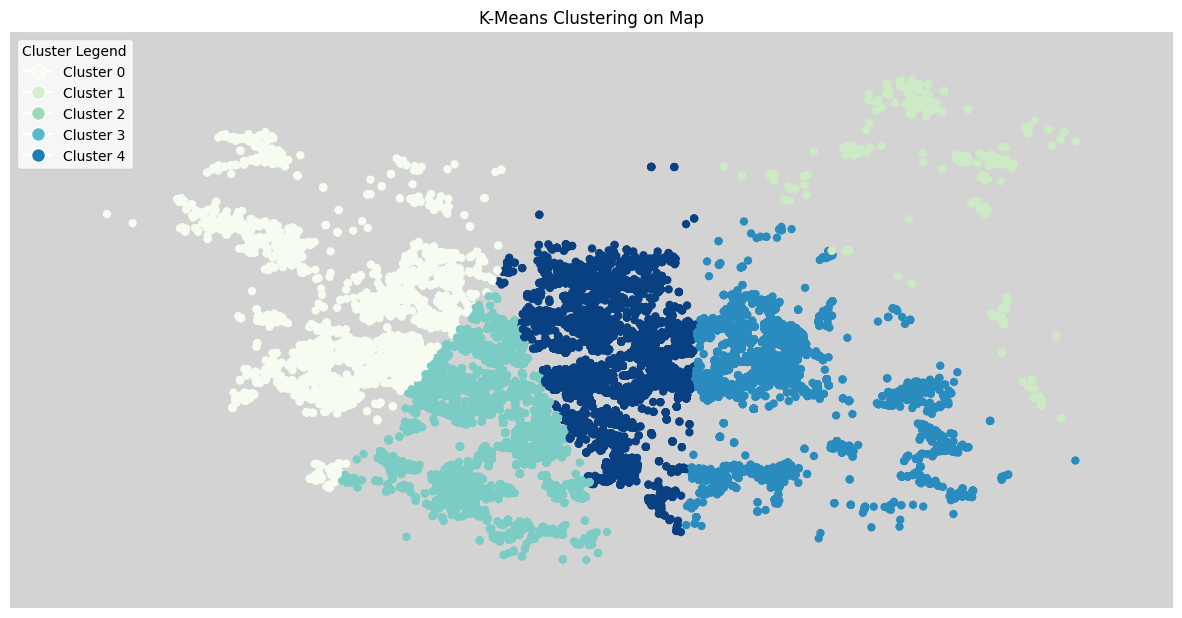

In [ ]:
#Create a DataFrame
loc=Leeds_cp[['Longitude','Latitude']].copy()
loc= pd.DataFrame(loc)

#Define the model
#Set K value
k=5
model=KMeans(n_clusters=k,init="random",max_iter=200, tol=1e-04)
#Training model
model=model.fit(loc)

#Add clustering labels to the DataFrame
loc['cluster']=model.labels_

#Convert DataFrame to Geopandas DataFrame
gdf=gpd.GeoDataFrame(loc,geometry=gpd.points_from_xy(loc.Longitude,loc.Latitude))

print(loc)

#Creating a map
#Read the Leeds map data
Leeds_map=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Create a map object and set the style
fig,ax=plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection':gcrs.PlateCarree()})
gplt.polyplot(Leeds_map,ax=ax,edgecolor='black', facecolor='lightgray')

#draw the clusters on the map
#label and title edit
plt.xlabel('Latitude',fontsize=15)
plt.ylabel('Longitude',fontsize=15)
plt.title('K-Means Clustering on Map')
#Set legend
legend_elements=[Line2D([0],[0],marker='o',color='w',label=f'Cluster {i}',markerfacecolor=plt.cm.GnBu(i/k),markersize=10)for i in range(k)]
#Add legend
ax.legend(handles=legend_elements,loc='upper left',title='Cluster Legend')

gplt.pointplot(gdf,ax=ax,hue='cluster',cmap='GnBu')
plt.show()

In [124]:
#Get the coordinates of the cluster centroid
cluster_centers=model.cluster_centers_
print(cluster_centers)

cc=pd.DataFrame(cluster_centers)
#Add column headers to a column using the rename method
cc=cc.rename(columns={cc.columns[0]: 'Longitude'})
cc=cc.rename(columns={cc.columns[1]: 'Latitude'})
cc

[[-1.44780718 53.79803994]
 [-1.64768885 53.82842837]
 [-1.52914824 53.80451905]
 [-1.58289531 53.77789014]
 [-1.37555507 53.90965474]]


,Longitude,Latitude
0,-1.447807,53.798040
1,-1.647689,53.828428
2,-1.529148,53.804519
3,-1.582895,53.777890
4,-1.375555,53.909655


All the above operations are referenced <a href="#ref6">[6]</a> <a href="#ref12">[12]</a> <a href="#ref13">[13]</a> <a href="#ref14">[14]</a> <a href="#ref15">[15]</a>

At this point I have obtained five clusters, which allow us to obtain the coordinates of specific centre points as the most suitable places to build police stations and increase the security presence.

## References
<p><a href="https://data.police.uk/data/">[1]</a>data.police.uk</p>
<p><a href="https://www.sciencedirect.com/science/article/abs/pii/S0166046210000086">[2]</a>Panel data estimates of the effects of different types of crime on housing prices</p>
<p><a href="https://link.springer.com/article/10.1007/s00181-012-0624-y">[3]</a>Housing prices and crime perception</p>
<p><a href="https://link.springer.com/article/10.1007/s10940-006-9013-z">[4]</a>Crime and Residential Choice: A Neighborhood Level Analysis of the Impact of Crime on Housing Prices</p>
<p><a href="https://data.cdrc.ac.uk/dataset/dwelling-ages-and-prices">[5]</a>cdrc.ac.uk</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[6]</a>GEOG5990M course materials</p>
<p><a href="https://geoportal.statistics.gov.uk/datasets/0f80c523f3cd4d0fab5111572f84a2fb_0/explore">[7]</a>National statistics</p>
<p><a href="https://ieeexplore.ieee.org/abstract/document/9543260">[8]</a>K-means clustering algorithm and Python implementation</p>
<p><a href="https://www.mdpi.com/2073-8994/14/6/1237">[9]</a>Using K-Means Clustering in Python with Periodic Boundary Conditions</p>
<p><a href="https://link.springer.com/chapter/10.1007/978-981-15-2407-3_21">[10]</a>Using K-means Clustering Algorithm with Python Programming for Predicting Breast Cancer</p>
<p><a href="https://www.researchgate.net/profile/Ehtiram-Khan/publication/335578228_Crime_Data_Analysis_in_Python_using_K_-_Means_Clustering/links/5f2089a092851cd5fa4edc83/Crime-Data-Analysis-in-Python-using-K-Means-Clustering.pdf">[11]</a>Crime Data Analysis in Python using K - Means
Clustering</p>
<p><a href="https://blog.csdn.net/m0_56694518/article/details/134957935?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522171643279616800186573029%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=171643279616800186573029&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-134957935-null-null.142^v100^pc_search_result_base8&utm_term=k-means&spm=1018.2226.3001.4187">[12]</a>K-means clustering model</p>
<p><a href="https://blog.csdn.net/xioacaiji/article/details/122811115?ops_request_misc=&request_id=&biz_id=102&utm_term=%E5%9C%B0%E7%90%86%E5%9D%90%E6%A0%87k-means&utm_medium=distribute.pc_search_result.none-task-blog-2~all~sobaiduweb~default-4-122811115.142^v100^pc_search_result_base8&spm=1018.2226.3001.4187">[13]</a>Python-based implementation of the k_means algorithm</p>
<p><a href="https://blog.csdn.net/Gou_Hailong/article/details/121795267?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522171648471416800211521668%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=171648471416800211521668&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-2-121795267-null-null.142^v100^pc_search_result_base8&utm_term=python%20legend&spm=1018.2226.3001.4187">[14]</a>Adjustments to Legend Legend in Python</p>
<p><a href="https://blog.csdn.net/jiebaoshayebuhui/article/details/128347217">[15]</a>K-Means Algorithm and Clustering of Coordinate Points (with source code and dataset)</p>